In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df=pd.read_csv("C:\\Users\\bhima\\OneDrive\\Desktop\\Mian Flow\\disney_plus_titles.csv")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1368 non-null   object
 1   type          1368 non-null   object
 2   title         1368 non-null   object
 3   director      928 non-null    object
 4   cast          1194 non-null   object
 5   country       1193 non-null   object
 6   date_added    1365 non-null   object
 7   release_year  1368 non-null   int64 
 8   rating        1366 non-null   object
 9   duration      1368 non-null   object
 10  listed_in     1368 non-null   object
 11  description   1368 non-null   object
dtypes: int64(1), object(11)
memory usage: 128.4+ KB


In [7]:
df.isnull().sum()

show_id           0
type              0
title             0
director        440
cast            174
country         175
date_added        3
release_year      0
rating            2
duration          0
listed_in         0
description       0
dtype: int64

In [11]:
df1=df.dropna(subset=['director','cast','country'])


In [12]:
df1.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

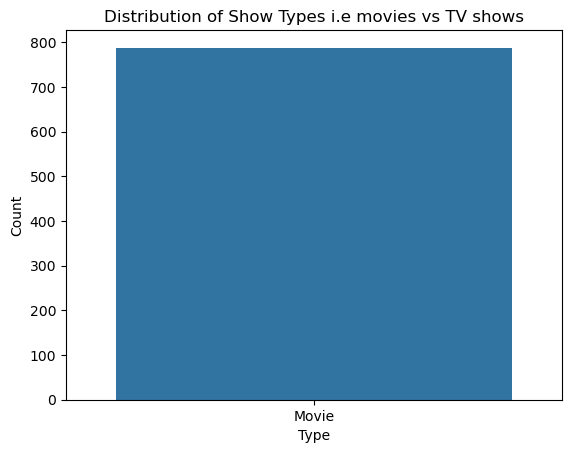

In [18]:
#asking questions
sns.countplot(x='type', data=df1)
plt.title('Distribution of Show Types i.e movies vs TV shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


In [20]:
# Avg duration
df1['duration_num'] = df1['duration'].str.extract('(\\d+)').astype(int)
average_duration = df1.groupby('type')['duration_num'].mean()
print("Average Duration:")
print(average_duration)


Average Duration:
type
Movie    82.799492
Name: duration_num, dtype: float64


In [21]:
#rating
common_rating = df1['rating'].mode()[0]
print("The most common rating is:", common_rating)


The most common rating is: G


In [23]:
top_country = df1['country'].value_counts().idxmax()
print("Country with the highest number of shows:", top_country)


Country with the highest number of shows: United States


In [25]:
long_shows = df1[df1['duration_num'] > 100]
print("Number of shows with a duration of more than 100 minutes:", long_shows.shape[0])


Number of shows with a duration of more than 100 minutes: 223


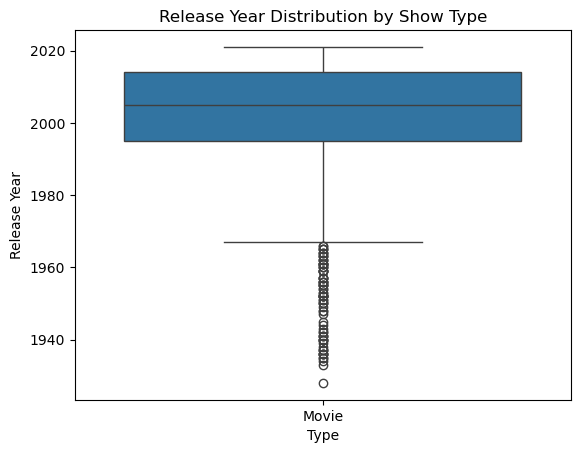

In [26]:
sns.boxplot(x='type', y='release_year', data=df1)
plt.title('Release Year Distribution by Show Type')
plt.xlabel('Type')
plt.ylabel('Release Year')
plt.show()


In [27]:
average_release_year = df1['release_year'].mean()
print("The average release year of all the shows:", average_release_year)


The average release year of all the shows: 1999.4340101522844


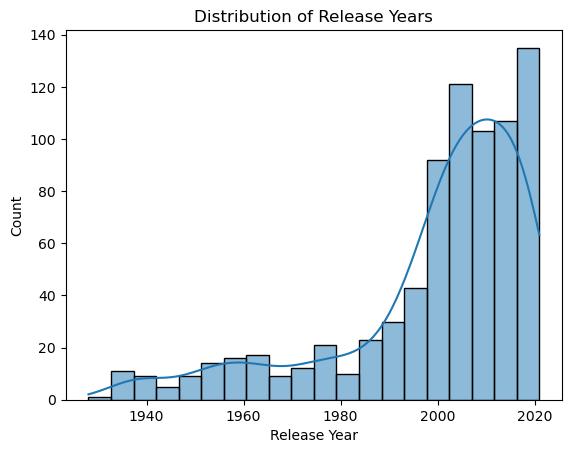

In [29]:
#histogram
sns.histplot(df1['release_year'], bins=20, kde=True)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()


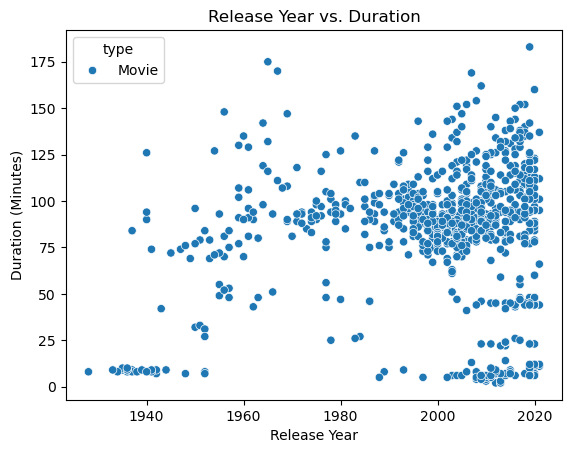

In [30]:
#scatter
sns.scatterplot(x='release_year', y='duration_num', hue='type', data=df1)
plt.title('Release Year vs. Duration')
plt.xlabel('Release Year')
plt.ylabel('Duration (Minutes)')
plt.show()


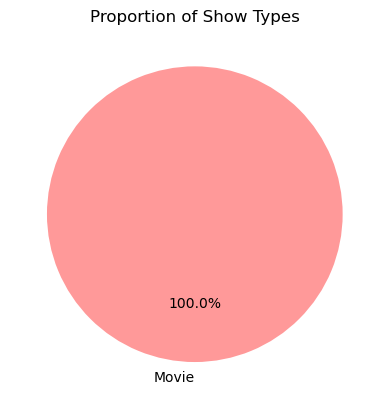

In [32]:
df1['type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Proportion of Show Types')
plt.ylabel('')
plt.show()
